### This notebook will read Canada's Food Nutrition Database to find out important features

In [1]:
#import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

***
### Tasks of this notebook
***
# Read Main Files
- "FOOD NAME.csv" - Contains the FoodID,FoodGroupID,FoodDescription as the important features
- "FOOD GROUP.csv" - Contains FoodGroupID, FoodGroupName as the important features
- "NUTRIENT AMOUNT.csv" - Contains FoodID, NutrientID, NutrientValue (per 100g of food) as the important features
- "NUTRIENT NAME.csv" - Contians NutrientSymbol, NutrientName, NutrientID, NutrientUnit as the important features
***
# Create Master CSV
- Removed all unnecessary features for our task
- Copied 'FOOD NAME.csv' to Master Dataframe
- Replaced FoodGroupID with FoodGroupName from 'FOOD GROUP.csv'
- Removed all Nutrients except Protein, Carbohydrate and Fat variants since most food contain vitamins, minerals and water leaving these three as the major food nutrients which we will be targeting.
- Created Columns in Master Dataframe for each of these nutrient values
- Used 'NUTRIENT AMOUNT.csv' to fill these nutrient values based on NutrientSymbol and FoodID
- Saved file as 'FoodNutritionData.csv'
***

In [2]:
food_name_df = pd.read_csv("FOOD NAME.csv", encoding = "ANSI")
display(food_name_df.head(5))

,FoodID,FoodCode,FoodGroupID,FoodSourceID,FoodDescription,FoodDescriptionF,FoodDateOfEntry,FoodDateOfPublication,CountryCode,ScientificName
0,2,2,22,20,Cheese souffle,Soufflé au fromage,1981-01-01,NaN,NaN,NaN
1,4,4,22,20,"Chop suey, with meat, canned","Chop suey, avec viande, conserve",1981-01-01,NaN,NaN,NaN
2,5,5,22,0,"Chinese dish, chow mein, chicken","Mets chinois, chow mein, poulet",1981-01-01,NaN,36623.0,NaN
3,6,6,18,20,Corn fritter,"Maïs, beignet",1981-01-01,NaN,NaN,NaN
4,7,7,22,36,"Beef pot roast, with browned potatoes, peas an...","Boeuf braisé, avec pomme de terre au four, poi...",1981-01-01,NaN,NaN,NaN


In [3]:
food_name_df.drop(columns=["FoodDescriptionF","FoodDateOfEntry","FoodDateOfPublication","CountryCode","ScientificName"], inplace=True)

In [4]:
display(food_name_df.head(10))

,FoodID,FoodCode,FoodGroupID,FoodSourceID,FoodDescription
0,2,2,22,20,Cheese souffle
1,4,4,22,20,"Chop suey, with meat, canned"
2,5,5,22,0,"Chinese dish, chow mein, chicken"
3,6,6,18,20,Corn fritter
4,7,7,22,36,"Beef pot roast, with browned potatoes, peas an..."
5,8,8,22,30,"Fried chicken, mashed potatoes and vegetables"
6,9,9,22,30,"Meat loaf with tomato sauce, mashed potatoes a..."
7,10,10,22,30,Sliced turkey with mashed potatoes and peas
8,13,13,2,20,"Vinegar, cider"
9,14,14,2,0,"Vinegar, distilled (white)"


In [5]:
food_group_df = pd.read_csv("FOOD GROUP.csv", encoding = "ANSI")
display(food_group_df.head(5))

,FoodGroupID,FoodGroupCode,FoodGroupName,FoodGroupNameF
0,1,1,Dairy and Egg Products,Produits laitiers et d'oeufs\n
1,2,2,Spices and Herbs,Épices et fines herbes
2,3,3,Babyfoods,Aliments pour bébés
3,4,4,Fats and Oils,Matières grasses et huiles
4,5,5,Poultry Products,Produits de volaille


In [6]:
food_main_df = food_name_df.copy()
food_main_df['FoodGroup'] = food_main_df.FoodGroupID.apply(lambda fid: food_group_df[food_group_df.FoodGroupID == fid].FoodGroupName.tolist()[0])
display(food_main_df.head(5))

,FoodID,FoodCode,FoodGroupID,FoodSourceID,FoodDescription,FoodGroup
0,2,2,22,20,Cheese souffle,Mixed Dishes
1,4,4,22,20,"Chop suey, with meat, canned",Mixed Dishes
2,5,5,22,0,"Chinese dish, chow mein, chicken",Mixed Dishes
3,6,6,18,20,Corn fritter,Baked Products
4,7,7,22,36,"Beef pot roast, with browned potatoes, peas an...",Mixed Dishes


In [7]:
food_main_df.drop(columns=['FoodSourceID','FoodGroupID'], inplace=True)

In [8]:
nutrient_val_df = pd.read_csv('NUTRIENT AMOUNT.csv', encoding = "ANSI")
display(nutrient_val_df.head(5))

,FoodID,NutrientID,NutrientValue,StandardError,NumberofObservations,NutrientSourceID,NutrientDateOfEntry
0,2,203,9.54,0.0,0.0,102,2010-04-16
1,2,204,15.70,0.0,0.0,102,2010-04-16
2,2,205,5.91,0.0,0.0,102,2010-04-16
3,2,207,1.67,0.0,0.0,102,2010-04-16
4,2,208,204.00,0.0,0.0,102,2010-04-16


In [9]:
nutrient_val_df.drop(columns=['NumberofObservations','NutrientSourceID','NutrientDateOfEntry'], inplace=True)
display(nutrient_val_df.head(5))

,FoodID,NutrientID,NutrientValue,StandardError
0,2,203,9.54,0.0
1,2,204,15.70,0.0
2,2,205,5.91,0.0
3,2,207,1.67,0.0
4,2,208,204.00,0.0


In [10]:
nutrient_name_df = pd.read_csv('NUTRIENT NAME.csv', encoding = "ANSI")
display(nutrient_name_df.head(5))

,NutrientID,NutrientCode,NutrientSymbol,NutrientUnit,NutrientName,NutrientNameF,Tagname,NutrientDecimals
0,203,203,PROT,g,PROTEIN,PROTÉINES,PROCNT,2
1,204,204,FAT,g,FAT (TOTAL LIPIDS),LIPIDES TOTAUX,FAT,2
2,205,205,CARB,g,"CARBOHYDRATE, TOTAL (BY DIFFERENCE)",GLUCIDES TOTAUX (PAR DIFFÉRENCE),CHOCDF,2
3,207,207,ASH,g,"ASH, TOTAL","CENDRES, TOTALES",ASH,2
4,208,208,KCAL,kCal,ENERGY (KILOCALORIES),ÉNERGIE (KILOCALORIES),ENERC_KCAL,0


In [11]:
display(nutrient_name_df.Tagname.value_counts())

PHE       1
F15D0     1
F4D0      1
LEU       1
F12D1     1
         ..
TYR       1
LYS       1
FATRNM    1
F21D5     1
ERGCAL    1
Name: Tagname, Length: 144, dtype: int64

In [12]:
display(food_main_df.FoodGroup.value_counts())

Vegetables and Vegetable Products    785
Baked Products                       441
Poultry Products                     418
Lamb, Veal and Game                  363
Fruits and fruit juices              328
Finfish and Shellfish Products       325
Sweets                               324
Soups, Sauces and Gravies            267
Beverages                            243
Dairy and Egg Products               241
Legumes and Legume Products          230
Breakfast cereals                    212
Pork Products                        209
Fast Foods                           174
Beef Products                        170
Cereals, Grains and Pasta            155
Sausages and Luncheon meats          149
Fats and Oils                        144
Nuts and Seeds                       139
Mixed Dishes                         123
Babyfoods                             94
Snacks                                93
Spices and Herbs                      63
Name: FoodGroup, dtype: int64

In [14]:
nutrient_name_df = nutrient_name_df[nutrient_name_df.NutrientSymbol.isin(['TSAT','MUFA','PUFA','PROT','FAT','CARB','STAR','TSUG','TDF'])].copy()
display(nutrient_name_df.head(10))

,NutrientID,NutrientCode,NutrientSymbol,NutrientUnit,NutrientName,NutrientNameF,Tagname,NutrientDecimals
0,203,203,PROT,g,PROTEIN,PROTÉINES,PROCNT,2
1,204,204,FAT,g,FAT (TOTAL LIPIDS),LIPIDES TOTAUX,FAT,2
2,205,205,CARB,g,"CARBOHYDRATE, TOTAL (BY DIFFERENCE)",GLUCIDES TOTAUX (PAR DIFFÉRENCE),CHOCDF,2
5,810,209,STAR,g,STARCH,AMIDON,STARCH,2
19,269,269,TSUG,g,"SUGARS, TOTAL",SUCRES TOTAUX,SUGAR,2
21,291,291,TDF,g,"FIBRE, TOTAL DIETARY",FIBRES ALIMENTAIRES TOTALES,FIBTG,1
86,606,606,TSAT,g,"FATTY ACIDS, SATURATED, TOTAL",ACIDES GRAS SATURÉS TOTAUX,FASAT,3
113,645,645,MUFA,g,"FATTY ACIDS, MONOUNSATURATED, TOTAL",ACIDES GRAS MONOINSATURÉS TOTAUX,FAMS,3
114,646,646,PUFA,g,"FATTY ACIDS, POLYUNSATURATED, TOTAL",ACIDES GRAS POLYINSATURÉS TOTAUX,FAPU,3


In [15]:
nutrient_val_df = nutrient_val_df[nutrient_val_df.NutrientID.isin(nutrient_name_df.NutrientID.tolist())].copy()
nutrient_val_df["NutrientName"] = nutrient_val_df.NutrientID.apply(lambda nid: nutrient_name_df[nutrient_name_df.NutrientID == nid].NutrientName.tolist()[0])
nutrient_val_df["NutrientSymbol"] = nutrient_val_df.NutrientID.apply(lambda nid: nutrient_name_df[nutrient_name_df.NutrientID == nid].NutrientSymbol.tolist()[0])
display(nutrient_val_df.head())

,FoodID,NutrientID,NutrientValue,StandardError,NutrientName,NutrientSymbol
0,2,203,9.54,0.0,PROTEIN,PROT
1,2,204,15.70,0.0,FAT (TOTAL LIPIDS),FAT
2,2,205,5.91,0.0,"CARBOHYDRATE, TOTAL (BY DIFFERENCE)",CARB
10,2,269,2.66,NaN,"SUGARS, TOTAL",TSUG
11,2,291,0.10,0.0,"FIBRE, TOTAL DIETARY",TDF


In [17]:
nutrient_val_df.fillna(0,inplace=True)

<AxesSubplot:>

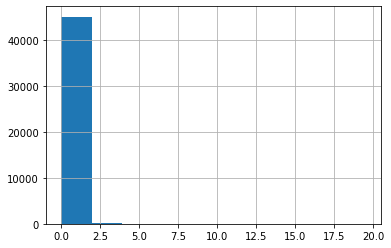

In [21]:
display(nutrient_val_df.StandardError.hist())

In [25]:
for i, row in nutrient_name_df.iterrows():
    food_main_df[str(row['NutrientSymbol']) + 'Value'] = 0.0

In [26]:
for i,row in food_main_df.iterrows():
    df_cpy = nutrient_val_df[nutrient_val_df.FoodID == row.FoodID].copy()
    for j,nutrow in df_cpy.iterrows():
        food_main_df.at[i, str(nutrow.NutrientSymbol) + 'Value'] = nutrow.NutrientValue
display(food_main_df.head(15))

,FoodID,FoodCode,FoodDescription,FoodGroup,PROTValue,FATValue,CARBValue,STARValue,TSUGValue,TDFValue,TSATValue,MUFAValue,PUFAValue
0,2,2,Cheese souffle,Mixed Dishes,9.54,15.70,5.91,0.00,2.66,0.1,5.742,5.820,2.770
1,4,4,"Chop suey, with meat, canned",Mixed Dishes,4.07,2.80,5.29,0.00,3.40,1.1,0.364,1.540,0.750
2,5,5,"Chinese dish, chow mein, chicken",Mixed Dishes,6.76,2.80,8.29,3.99,1.74,1.0,0.490,0.613,1.226
3,6,6,Corn fritter,Baked Products,8.55,21.24,38.62,0.00,2.85,2.0,5.455,8.543,5.564
4,7,7,"Beef pot roast, with browned potatoes, peas an...",Mixed Dishes,21.29,5.25,10.72,0.00,1.44,1.6,1.872,2.552,0.709
5,8,8,"Fried chicken, mashed potatoes and vegetables",Mixed Dishes,12.80,8.50,11.30,0.00,0.00,1.0,3.000,3.000,1.000
6,9,9,"Meat loaf with tomato sauce, mashed potatoes a...",Mixed Dishes,8.00,6.70,9.80,0.00,0.00,1.2,3.000,3.000,0.000
7,10,10,Sliced turkey with mashed potatoes and peas,Mixed Dishes,8.40,3.00,12.70,0.00,0.00,1.1,1.000,1.000,0.000
8,13,13,"Vinegar, cider",Spices and Herbs,0.00,0.00,0.93,0.00,0.40,0.0,0.000,0.000,0.000
9,14,14,"Vinegar, distilled (white)",Spices and Herbs,0.00,0.00,0.04,0.00,0.04,0.0,0.000,0.000,0.000


In [27]:
food_main_df.drop(columns=['FoodCode'],inplace=True)
food_main_df.to_csv('FoodNutritionData.csv',index=False)